# Explora aquí

Se recomienda utilizar este cuaderno con fines de exploración.

In [1]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns



In [4]:
url = 'https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue'

response = requests.get(url)
print(response.status_code)

if response.status_code == 403:
    headers = {'User-Agent':"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36"}
    request = requests.get(url,headers=headers)
    time.sleep(5)
    html_data = request.text
    print(request.status_code)

html_data

403
200


'\r\n<!DOCTYPE html>\r\n<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->\r\n<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->\r\n<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->\r\n<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->\r\n    <head>\r\n        <meta charset="utf-8">\r\n        <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\r\n\t\t<link rel="canonical" href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" />\r\n\t\t<link rel="alternate" media="only screen and (max-width: 768px)" href="https://m.macrotrends.net/stocks/charts/TSLA/tesla/revenue">\r\n\t\t<title>Tesla Revenue 2010-2024 | TSLA | MacroTrends</title>\r\n\t\t<link rel="icon" type="image/x-icon" href="/assets/images/icons/FAVICON/macrotrends-favicon-96.png">\r\n\t\t<meta name="description" content="Tesla annual/quarterly revenue history and growth rate from 2010 to 2024. Revenue can be defined as the amount of mo

In [8]:
#transformo el html en algo más facil de leer
soup = BeautifulSoup(html_data, 'html.parser')
soup


<!DOCTYPE html>

<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<link href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" rel="canonical"/>
<link href="https://m.macrotrends.net/stocks/charts/TSLA/tesla/revenue" media="only screen and (max-width: 768px)" rel="alternate"/>
<title>Tesla Revenue 2010-2024 | TSLA | MacroTrends</title>
<link href="/assets/images/icons/FAVICON/macrotrends-favicon-96.png" rel="icon" type="image/x-icon"/>
<meta content="Tesla annual/quarterly revenue history and growth rate from 2010 to 2024. Revenue can be defined as the amount of money a company receives from its customers in exchange for the sales of goods or services.  Reve

In [9]:
todas_tablas = soup.find_all('table')
todas_tablas

[<table class="historical_data_table table">
 <thead>
 <tr>
 <th colspan="2" style="text-align:center">Tesla Annual Revenue<br/><span style="font-size:14px;">(Millions of US $)</span></th>
 </tr>
 </thead>
 <tbody>
 <tr>
 <td style="text-align:center">2023</td>
 <td style="text-align:center">$96,773</td>
 </tr>
 <tr>
 <td style="text-align:center">2022</td>
 <td style="text-align:center">$81,462</td>
 </tr>
 <tr>
 <td style="text-align:center">2021</td>
 <td style="text-align:center">$53,823</td>
 </tr>
 <tr>
 <td style="text-align:center">2020</td>
 <td style="text-align:center">$31,536</td>
 </tr>
 <tr>
 <td style="text-align:center">2019</td>
 <td style="text-align:center">$24,578</td>
 </tr>
 <tr>
 <td style="text-align:center">2018</td>
 <td style="text-align:center">$21,461</td>
 </tr>
 <tr>
 <td style="text-align:center">2017</td>
 <td style="text-align:center">$11,759</td>
 </tr>
 <tr>
 <td style="text-align:center">2016</td>
 <td style="text-align:center">$7,000</td>
 </tr>
 <

In [11]:
for index, table in enumerate(todas_tablas):
    if ('2023-06-30' in str(table)):
        table_index = index
        print(table_index)
        break
        
todas_tablas[table_index]


1


<table class="historical_data_table table">
<thead>
<tr>
<th colspan="2" style="text-align:center">Tesla Quarterly Revenue<br/><span style="font-size:14px;">(Millions of US $)</span></th>
</tr>
</thead>
<tbody>
<tr>
<td style="text-align:center">2024-09-30</td>
<td style="text-align:center">$25,182</td>
</tr>
<tr>
<td style="text-align:center">2024-06-30</td>
<td style="text-align:center">$25,500</td>
</tr>
<tr>
<td style="text-align:center">2024-03-31</td>
<td style="text-align:center">$21,301</td>
</tr>
<tr>
<td style="text-align:center">2023-12-31</td>
<td style="text-align:center">$25,167</td>
</tr>
<tr>
<td style="text-align:center">2023-09-30</td>
<td style="text-align:center">$23,350</td>
</tr>
<tr>
<td style="text-align:center">2023-06-30</td>
<td style="text-align:center">$24,927</td>
</tr>
<tr>
<td style="text-align:center">2023-03-31</td>
<td style="text-align:center">$23,329</td>
</tr>
<tr>
<td style="text-align:center">2022-12-31</td>
<td style="text-align:center">$24,318<

In [18]:
import pandas as pd
df_tesla= pd.DataFrame(columns=['Fecha','Revenue'])

#iteraremos por la tabla para ir sacando los datos

for row in todas_tablas[table_index].tbody.find_all('tr'):
    col = row.find_all('td')
    if col != []:
        fecha = col[0].text
        revenue = col[1].text.replace('$','').replace(',','')
        df_tesla = pd.concat([df_tesla,pd.DataFrame({'Fecha':fecha, 'Revenue':revenue},index=[0])], ignore_index=True)

df_tesla
        

,Fecha,Revenue
0,2024-09-30,25182
1,2024-06-30,25500
2,2024-03-31,21301
3,2023-12-31,25167
4,2023-09-30,23350
...,...,...
57,2010-06-30,28
58,2010-03-31,21
59,2009-12-31,
60,2009-09-30,46


In [21]:
df_tesla.isnull().sum() #no hay valores nulos
df_tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Fecha    62 non-null     object
 1   Revenue  62 non-null     object
dtypes: object(2)
memory usage: 1.1+ KB


In [25]:
df_tesla['Revenue'] = pd.to_numeric(df_tesla['Revenue'])
df_tesla.info()
#para eliminar una columna
df_tesla.drop('revenue', axis=1, inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Fecha    62 non-null     object 
 1   Revenue  61 non-null     float64
 2   revenue  61 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.6+ KB


In [28]:

#para eliminar la fila con el valor nulo
df_tesla.dropna(inplace=True)
df_tesla.info()
df_tesla.to_csv('../assets/tesla.csv',index=False)

<class 'pandas.core.frame.DataFrame'>
Index: 61 entries, 0 to 61
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Fecha    61 non-null     object 
 1   Revenue  61 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.4+ KB


In [29]:
connection = sqlite3.connect('Tesla.db')
cursor = connection.cursor()
cursor.execute('''
    CREATE TABLE IF NOT EXISTS Revenue_Tesla_trimestre(
        Fecha DATE,
        Revenue INTEGER
    )
''')


In [30]:
tuplas = list(df_tesla.to_records(index=False))
tuplas

[np.record(('2024-09-30', 25182.0), dtype=[('Fecha', 'O'), ('Revenue', '<f8')]),
 np.record(('2024-06-30', 25500.0), dtype=[('Fecha', 'O'), ('Revenue', '<f8')]),
 np.record(('2024-03-31', 21301.0), dtype=[('Fecha', 'O'), ('Revenue', '<f8')]),
 np.record(('2023-12-31', 25167.0), dtype=[('Fecha', 'O'), ('Revenue', '<f8')]),
 np.record(('2023-09-30', 23350.0), dtype=[('Fecha', 'O'), ('Revenue', '<f8')]),
 np.record(('2023-06-30', 24927.0), dtype=[('Fecha', 'O'), ('Revenue', '<f8')]),
 np.record(('2023-03-31', 23329.0), dtype=[('Fecha', 'O'), ('Revenue', '<f8')]),
 np.record(('2022-12-31', 24318.0), dtype=[('Fecha', 'O'), ('Revenue', '<f8')]),
 np.record(('2022-09-30', 21454.0), dtype=[('Fecha', 'O'), ('Revenue', '<f8')]),
 np.record(('2022-06-30', 16934.0), dtype=[('Fecha', 'O'), ('Revenue', '<f8')]),
 np.record(('2022-03-31', 18756.0), dtype=[('Fecha', 'O'), ('Revenue', '<f8')]),
 np.record(('2021-12-31', 17719.0), dtype=[('Fecha', 'O'), ('Revenue', '<f8')]),
 np.record(('2021-09-30', 13

In [32]:
#meter las tuplas en sqlite

cursor.executemany('INSERT INTO Revenue_Tesla_trimestre VALUES (?,?)',tuplas)
connection.commit()

In [33]:
Resultado= cursor.execute('SELECT * FROM Revenue_Tesla_trimestre').fetchall()

for row in Resultado:
    print(row)

('2024-09-30', 25182)
('2024-06-30', 25500)
('2024-03-31', 21301)
('2023-12-31', 25167)
('2023-09-30', 23350)
('2023-06-30', 24927)
('2023-03-31', 23329)
('2022-12-31', 24318)
('2022-09-30', 21454)
('2022-06-30', 16934)
('2022-03-31', 18756)
('2021-12-31', 17719)
('2021-09-30', 13757)
('2021-06-30', 11958)
('2021-03-31', 10389)
('2020-12-31', 10744)
('2020-09-30', 8771)
('2020-06-30', 6036)
('2020-03-31', 5985)
('2019-12-31', 7384)
('2019-09-30', 6303)
('2019-06-30', 6350)
('2019-03-31', 4541)
('2018-12-31', 7226)
('2018-09-30', 6824)
('2018-06-30', 4002)
('2018-03-31', 3409)
('2017-12-31', 3288)
('2017-09-30', 2985)
('2017-06-30', 2790)
('2017-03-31', 2696)
('2016-12-31', 2285)
('2016-09-30', 2298)
('2016-06-30', 1270)
('2016-03-31', 1147)
('2015-12-31', 1214)
('2015-09-30', 937)
('2015-06-30', 955)
('2015-03-31', 940)
('2014-12-31', 957)
('2014-09-30', 852)
('2014-06-30', 769)
('2014-03-31', 621)
('2013-12-31', 615)
('2013-09-30', 431)
('2013-06-30', 405)
('2013-03-31', 562)
('2012-1

In [ ]:
#ahora haré lo mismo más fácilmente con pandas
df_tesla.to_sql('Revenue_Tesla_trimestre', connection, if_exists='replace', index=False)





,Fecha,Revenue
0,2024-09-30,25182.0
1,2024-06-30,25500.0
2,2024-03-31,21301.0
3,2023-12-31,25167.0
4,2023-09-30,23350.0
...,...,...
56,2010-09-30,31.0
57,2010-06-30,28.0
58,2010-03-31,21.0
59,2009-09-30,46.0


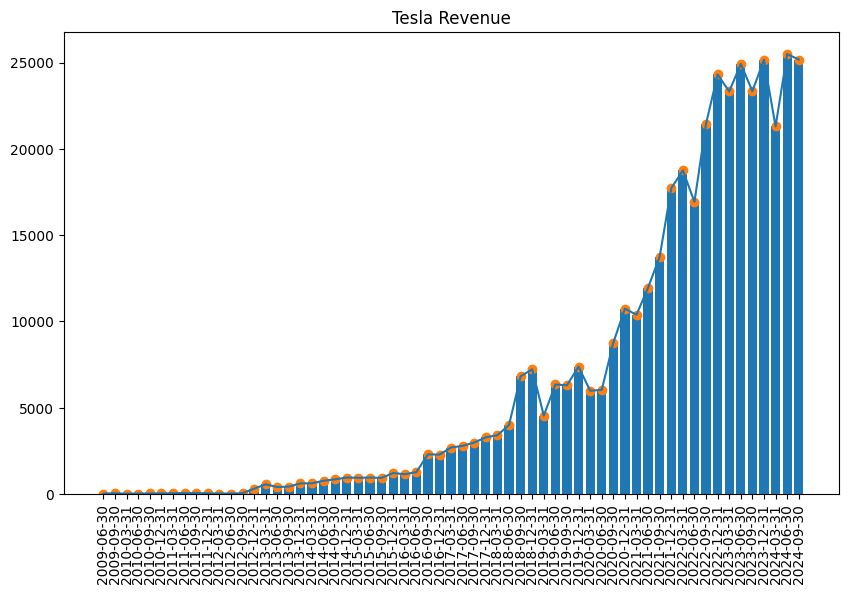

In [41]:
#Ahora vamos a hacer una gráfica con los datos
plt.figure(figsize=(10,6))
#sns.lineplot(x='Fecha',y='Revenue',data=df_tesla)
#plt.title('Tesla Revenue')
#plt.xticks(rotation=90)
#plt.show()

plt.plot(df_tesla['Fecha'][::-1],df_tesla['Revenue'][::-1])
plt.bar(df_tesla['Fecha'][::-1],df_tesla['Revenue'][::-1])
plt.scatter(df_tesla['Fecha'][::-1],df_tesla['Revenue'][::-1])
plt.title('Tesla Revenue')
plt.xticks(rotation=90)
plt.show()



In [ ]:
#finished